In [1]:
import pandas as pd

In [28]:
# Columns: account_id, name, point, call_count, total_call_time, total_exclusive_time, min_call_time, max_call_time, sum_of_squares, instances, language, app_name, app_id, scope, host, display_host, pid, agent_version, labels
# do not exepct index column
data = pd.read_csv('.././data/metrics_collector.tsv', sep='\t',names=['account_id', 'name', 'point', 'call_count', 'total_call_time', 'total_exclusive_time', 'min_call_time', 'max_call_time', 'sum_of_squares', 'instances', 'language', 'app_name', 'app_id', 'scope', 'host', 'display_host', 'pid', 'agent_version', 'labels'], header=None)
data['point'] = pd.to_datetime(data['point'])
data['scope'].fillna('', inplace=True)

C:\Users\germi\AppData\Local\Temp\ipykernel_2476\2427093020.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('.././data/metrics_collector.tsv', sep='\t',names=['account_id', 'name', 'point', 'call_count', 'total_call_time', 'total_exclusive_time', 'min_call_time', 'max_call_time', 'sum_of_squares', 'instances', 'language', 'app_name', 'app_id', 'scope', 'host', 'display_host', 'pid', 'agent_version', 'labels'], header=None)


In [43]:
filtered_data = data[
    (data['language'] == 'java') &
    (data['app_name'] == '[GMonit] Collector') &
    (data['scope'] == '') &
    (data['name'] == 'HttpDispatcher')
]

# Group by 'point' and calculate the sum and mean
web_response = filtered_data.groupby('point').apply(
    lambda x: pd.Series({
        'web_response': x['total_call_time'].sum() / x['call_count'].sum()
    })
).reset_index()
web_response = web_response.sort_values(by='point')


In [47]:
filtered_data = data[
    (data['language'] == 'java') &
    (data['app_name'] == '[GMonit] Collector') &
    (data['scope'] == '') &
    (data['name'] == 'HttpDispatcher')
]
throughput = filtered_data.groupby('point')['call_count'].sum().reset_index()
throughput.columns = ['point', 'sum_call_count']
throughput  = throughput.sort_values(by='point')


In [93]:
import pandas as pd

filtered_data = data[
    (data['language'] == 'java') &
    (data['app_name'] == '[GMonit] Collector') &
    (data['scope'] == '') &
    (data['name'] == 'Apdex')
]
grouped_data = filtered_data.groupby('point').agg({
    'call_count': 'sum',
    'total_call_time': 'sum',
    'total_exclusive_time': 'sum'
}).reset_index()
grouped_data['apdex'] = (grouped_data['call_count'] + grouped_data['total_call_time'] / 2) / (
    grouped_data['call_count'] + grouped_data['total_call_time'] + grouped_data['total_exclusive_time']
)
grouped_data = grouped_data.rename(columns={'point': 'point'})
apdex = grouped_data[['point', 'apdex']]
apdex = apdex.sort_values(by='point')


# Find seosanality

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

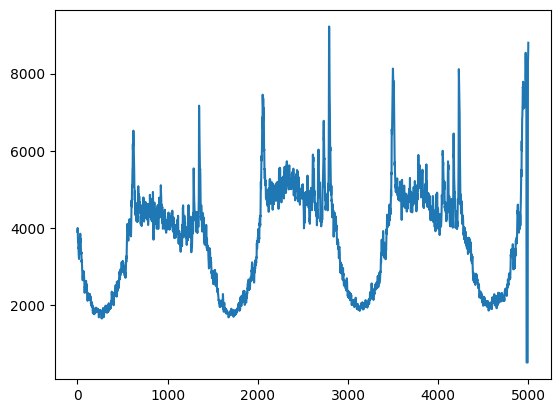

<Figure size 1000x600 with 0 Axes>

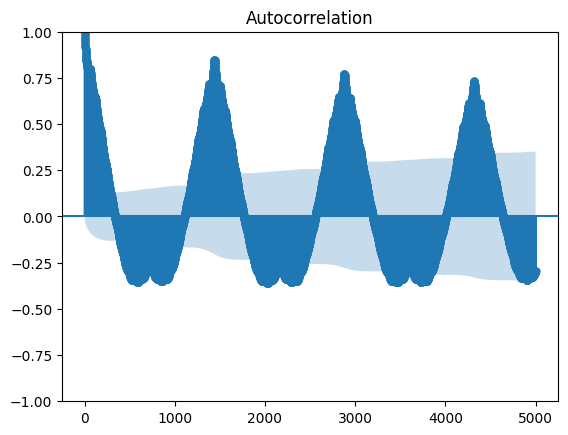

The estimated season length is: 1


In [89]:
throughput['sum_call_count'][0:5000].plot()
# Step 2: Calculate the autocorrelation function
lag_acf = acf(throughput['sum_call_count'], nlags=5000)

# Step 3: Plot the ACF to visualize the lags
plt.figure(figsize=(10, 6))
plot_acf(throughput['sum_call_count'], lags=5000)
plt.show()

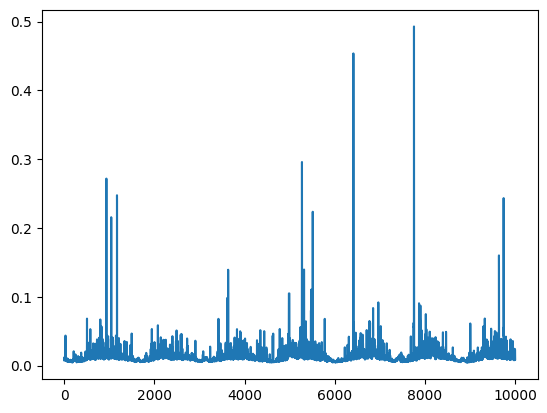

<Figure size 1000x600 with 0 Axes>

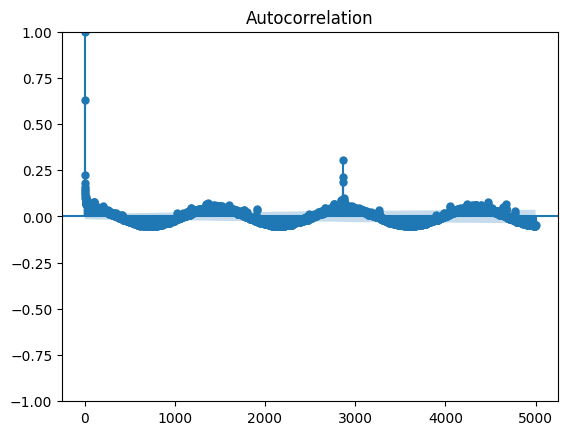

In [91]:
web_response['web_response'][0:10000].plot()
# Step 2: Calculate the autocorrelation function
lag_acf = acf(web_response['web_response'], nlags=5000)

# Step 3: Plot the ACF to visualize the lags
plt.figure(figsize=(10, 6))
plot_acf(web_response['web_response'], lags=5000)
plt.show()

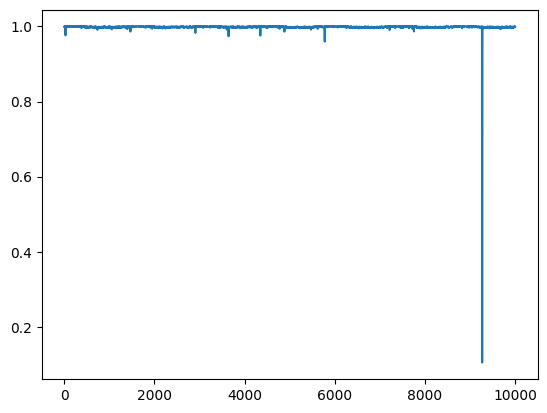

<Figure size 1000x600 with 0 Axes>

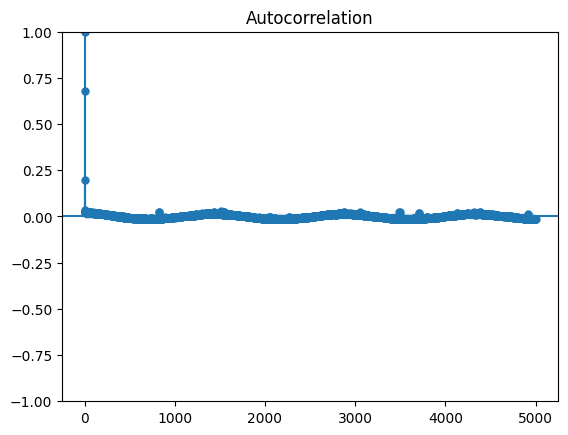

In [95]:
apdex['apdex'][0:10000].plot()
# Step 2: Calculate the autocorrelation function
lag_acf = acf(apdex['apdex'], nlags=5000)

# Step 3: Plot the ACF to visualize the lags
plt.figure(figsize=(10, 6))
plot_acf(apdex['apdex'], lags=5000)
plt.show()